In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import colorcet as cc

from helper import Helper, irrep_H

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{amssymb} \\usepackage{amsmath}'

In [3]:
%load_ext autoreload
%autoreload 2

# Example analysis

This notebook exemplifies how to navigate the data for anomaly-free models with $T\leq 1$. Some functionality is provided in `helper.py` for loading, organizing and transforming the models.

## Initialization

Create the helper and load irrep, vertex and model data. Providing branching rules allows for Higgsing of models.

In [4]:
T = 0
folder_data = f'../data/T={T}'
folder_branching_rules = '../branching-rules'

hp = Helper(T, folder_data, folder_branching_rules)

Vertices
  Reading in upper bounds on Δ from ../data/T=0/groups-Δmax.txt
  Loading vertices from 49 files in the folder ../data/T=0/vertices


  Files: 100%|##########| 49/49 [00:00<00:00, 531.34it/s]


DONE. Loaded a total of 5,103 vertices for 49 simple groups.

Models
  Loading models from 7 files in the folder ../data/T=0/anomaly-free-models


  Files: 100%|##########| 7/7 [00:01<00:00,  4.10it/s]


  Tallying vertex usage...


    Model: 100%|##########| 18988/18988 [00:00<00:00, 328580.92it/s]


  Pre-computing...


    Triality: 100%|##########| 18988/18988 [00:07<00:00, 2561.22it/s]


DONE. Loaded a total of 18,988 models.

Branching rules
  Loading branching rules from 963 files in the folder ../branching-rules


  Files: 100%|##########| 963/963 [00:00<00:00, 3778.81it/s]

DONE. Loaded a total of 418 branching rules for 49 simple groups.



Vertices are stored in a dictionary by group:

In [5]:
group_ID = 'A09'  # SU(10)
for vertex in hp.vertices[group_ID].values():
    vertex.display()
print('\n', hp.vertices[group_ID])

vtx-A09-176-1-3             Δ =  176    bi.bi =    1    b0.bi =    3    hypers = 14 x irr-A9-10 + 3 x irr-A9-45
vtx-A09-251-4-6             Δ =  251    bi.bi =    4    b0.bi =    6    hypers = 8 x irr-A9-10 + 6 x irr-A9-45
vtx-A09-275-9-9             Δ =  275    bi.bi =    9    b0.bi =    9    hypers = 2 x irr-A9-10 + 3 x irr-A9-45 + 1 x irr-A9-99 + 1 x irr-A9-120
vtx-A09-276-9-9             Δ =  276    bi.bi =    9    b0.bi =    9    hypers = 2 x irr-A9-10 + 4 x irr-A9-45 + 1 x irr-A9-55 + 1 x irr-A9-120
vtx-A09-276-16-12           Δ =  276    bi.bi =   16    b0.bi =   12    hypers = 3 x irr-A9-55 + 1 x irr-A9-210
vtx-A09-301-4-6             Δ =  301    bi.bi =    4    b0.bi =    6    hypers = 28 x irr-A9-10 + 1 x irr-A9-120
vtx-A09-352-9-9             Δ =  352    bi.bi =    9    b0.bi =    9    hypers = 27 x irr-A9-10 + 1 x irr-A9-55 + 0.5 x irr-A9-252-q

 {'vtx-A09-176-1-3': <helper.Vertex object at 0x00000225747A4640>, 'vtx-A09-251-4-6': <helper.Vertex object at 0x00000225747A45E0>

Models are stored both in a list by increasing $\Delta$...

In [6]:
for model in hp.models[:3]:
    model.display()
print('\n', hp.models[:3])


mdl-(0,0,0)-0-EMPTY
———————————————————
Δ = 0
vertices: []
bI.bJ =
[9]
bI-odd =
[[3]]
hypers =
 273 × ()


mdl-(0,0,1)-77-C5EF9AAF16029364
———————————————————————————————
Δ = 77
vertices: [vtx-G02-77-1-3]
bI.bJ =
[[9 3]
 [3 1]]
bI-odd =
[[3 1]]
hypers =
 196 × (•       )
  13 × (irr-G2-7)


mdl-(0,0,1)-140-5CFBF6CE9185B8D8
————————————————————————————————
Δ = 140
vertices: [vtx-G02-140-4-6]
bI.bJ =
[[9 6]
 [6 4]]
bI-odd =
[[3 2]]
hypers =
 133 × (•       )
  22 × (irr-G2-7)


 [<helper.Model object at 0x0000022574827BE0>, <helper.Model object at 0x00000225749E62B0>, <helper.Model object at 0x00000225749E6310>]


...and in a dictionary with hash (see `helper.Model.get_hyper_hash()`) for keys

In [7]:
hp.models_by_hash

{1216587550550414152681319076765389120247399096202: <helper.Model at 0x22574827be0>,
 14020514619354632346449817306128325218366193247: <helper.Model at 0x225749e62b0>,
 1129105141405052770479618301116572674292600756729: <helper.Model at 0x225749e6310>,
 133524400379784952477880725437032927785032892196: <helper.Model at 0x225749e63d0>,
 1177029126869243917407009066968077238374899514482: <helper.Model at 0x225749e6460>,
 945251973833616471458390570987486024442318597352: <helper.Model at 0x225749e64f0>,
 52276943618826737831691751114111800392373150617: <helper.Model at 0x225749e65b0>,
 676534064023366248699876833964663282826911871107: <helper.Model at 0x225749e6670>,
 1458442722374866340690036032188476935362806392731: <helper.Model at 0x225749e6730>,
 200047250178703025268300922987712871736822545107: <helper.Model at 0x225749e6820>,
 1123358630800949239341159633593408321985659558125: <helper.Model at 0x225749e68e0>,
 809856786521981393316496483480183074481194047060: <helper.Model at 0x225

## Vertex usage

Visualize vertices using how many times they appear in anomaly-free models.

In [8]:
usage_data = {'SU': [[], []], 'SO': [[], []], 'Sp': [[], []], 'EFG': [[], []]}

for group_vertices in hp.vertices.values():
    for vertex in group_vertices.values():
        SNT_type = np.sign(vertex.bibi)
        ii = int(vertex.times_used > 0)
        data = [vertex.group_N, vertex.delta, SNT_type]
        usage_data[vertex.group_type][ii].append(data)

for key, arr in usage_data.items():
    usage_data[key] = [np.array(aa).T for aa in arr]

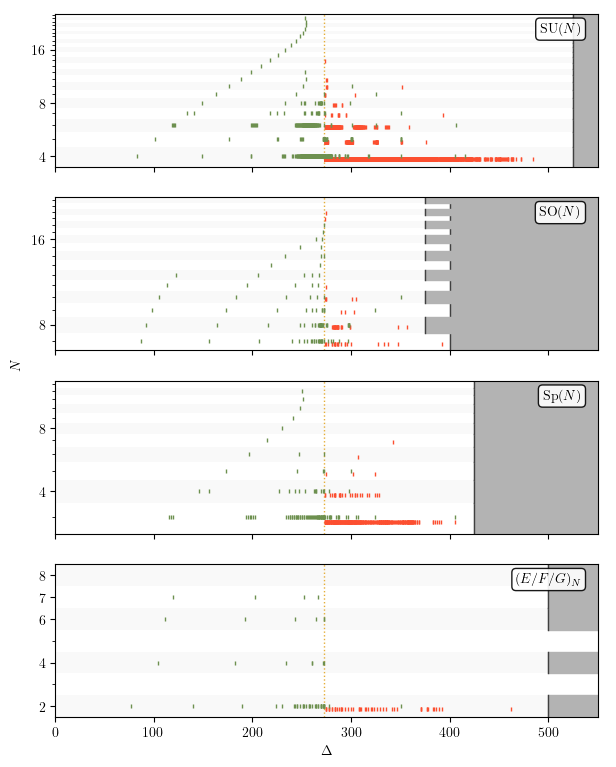

In [9]:
if hp.T == 0:
    xy_bounds = [
        [[0, 550], [4, 25]],
        [[0, 550], [7, 22]],
        [[0, 550], [3, 13]],
        [[0, 550], [2,  8]]
    ]
elif hp.T == 1:
    xy_bounds = [
        [[ -50, 1050], [4, 36]],
        [[ -50, 1050], [7, 40]],
        [[ -50, 1050], [3, 32]],
        [[-300, 1050], [2,  8]]
    ]

pt_colors = [cc.glasbey_hv[ii] for ii in [1, 3]]
bound_color = '0.7'
bound_edge_color = '0.25'
stripe_color = '0.975'
line_color = cc.glasbey_hv[2]
sep = 0.15

fig, axes = plt.subplots(4, figsize=(6.5,8), sharex=True)

for ax, group_type, bounds in zip(axes, ['SU', 'SO', 'Sp', 'EFG'], xy_bounds):
    for ii, [[Ns, deltas, types], col] in enumerate(zip(usage_data[group_type], pt_colors)):
        ax.scatter(deltas[types ==  1], Ns[types ==  1] + (ii-1)*sep, 7, marker='|', fc=col, lw=1, zorder=2)
        ax.scatter(deltas[types ==  0], Ns[types ==  0] + (ii-1)*sep, 7, marker='x', fc=col, lw=1, zorder=2)
        ax.scatter(deltas[types == -1], Ns[types == -1] + (ii-1)*sep, 7, marker='o', ec=col, lw=1, fc='none', zorder=2)

    xmin, xmax = bounds[0]
    for n in range(2, 40, 2):
        ax.fill_between([xmin, xmax], n-0.5, n+0.5, color=stripe_color, lw=0, zorder=0)

    for n, bound in hp.Δ_upper_bounds[group_type]:
        ax.fill_between([bound, xmax], n-0.5, n+0.5, color=bound_color, zorder=2)
        ax.plot([bound, bound], [n-0.5, n+0.5], '-', c=bound_edge_color, lw=1, zorder=2)

    ax.axvline(273, ls=':', c=line_color, lw=1, zorder=1)

    if ax is axes[3]:
        yticks_major = [2, 4, 6, 7, 8]
    else:
        yticks_major = [2, 4, 8, 16, 32]
        ax.set_yscale('log')
    ax.set_yticks(yticks_major, labels=[f'${nn}$' for nn in yticks_major], minor=False)
    ax.set_yticks(range(2, 40), labels=[], minor=True)

    ax.set_xlim(bounds[0])
    ax.set_ylim([bounds[1][0]-0.5, bounds[1][1]+0.5])

for ax, label in zip(axes, ['$\mathrm{SU}(N)$', '$\mathrm{SO}(N)$', '$\mathrm{Sp}(N)$', '$(E/F/G)_N$']):
    ax.text(0.97, 0.9, label,
        transform=ax.transAxes,
        horizontalalignment='right',
        verticalalignment='center',
        bbox=dict(facecolor='w', alpha=0.9, edgecolor='k', boxstyle='round')
    )

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('$\Delta$')
plt.ylabel('$N$')

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

plt.show()

## Searching for models

One way to extract models of interest is to first collect IDs for vertices with some desired property.

For example, vertices with large $\Delta$...

In [10]:
vertex_IDs_subset = []
for group_ID, vertices_by_group in hp.vertices.items():
    for vertex in vertices_by_group.values():
        if vertex.delta > 400 and vertex.times_used > 0:
            vertex.display()
            vertex_IDs_subset.append(vertex.ID)

vtx-A03-405-144-36-b        Δ =  405    bi.bi =  144    b0.bi =   36    hypers = 56 x irr-A3-6 + 1 x irr-A3-84a
vtx-A03-416-100-30          Δ =  416    bi.bi =  100    b0.bi =   30    hypers = 66 x irr-A3-6 + 1 x irr-A3-35
vtx-A05-406-36-18           Δ =  406    bi.bi =   36    b0.bi =   18    hypers = 56 x irr-A5-6 + 1 x irr-A5-105b
vtx-C03-405-36-18-b         Δ =  405    bi.bi =   36    b0.bi =   18    hypers = 56 x irr-C3-6-q + 1 x irr-C3-90


... or with a particular $\mathrm{SU}(9)$ irrep

In [11]:
vertex_IDs_subset = []
for group_ID, vertices_by_group in hp.vertices.items():
    if group_ID != 'A08':
        continue
    for vertex in vertices_by_group.values():
        if 'irr-A8-126' in vertex.hypers.keys() and vertex.times_used > 0:
            vertex.display()
            vertex_IDs_subset.append(vertex.ID)

vtx-A08-325-9-9             Δ =  325    bi.bi =    9    b0.bi =    9    hypers = 26 x irr-A8-9 + 1 x irr-A8-45 + 1 x irr-A8-126


Then scan through models checking if it contains one or more of the identified vertices.

In [12]:
models_subset = []
for model in hp.models:
    num = len(np.intersect1d(model.vertex_IDs, vertex_IDs_subset))
    if num > 0:
        models_subset.append(model)
print(f'\n{len(models_subset)} model(s) found with one or more of the vertices')


1 model(s) found with one or more of the vertices


In [13]:
for model in models_subset:
    model.display()


mdl-(0,0,2)-273-51954231BCBC73A3
————————————————————————————————
Δ = 273
vertices: [vtx-F04-182-4-6, vtx-A08-325-9-9]
bI.bJ =
[[9 6 9]
 [6 4 6]
 [9 6 9]]
bI-odd =
[[3 2 3]]
hypers =
       (•         irr-A8-45 )
       (•         irr-A8-126)
       (irr-F4-26 irr-A8-9  )



Can also extract all models with $(3+)$-charged hypers.

In [14]:
models_3plus = []
irreps_3plus = dict()

for model in tqdm(hp.models, ascii=True):
    model_irreps_3plus = set()
    for irreps in model.hypers:
        irreps_nontriv = [irrep for irrep in irreps if irrep_H(irrep) > 1]
        if len(irreps_nontriv) >= 3:
            irreps_nontriv = tuple(sorted(irreps_nontriv))
            model_irreps_3plus.add(irreps_nontriv)
    if len(model_irreps_3plus) > 0:
        models_3plus.append(model)
    for irreps in model_irreps_3plus:
        if irreps in irreps_3plus:
            irreps_3plus[irreps] += 1
        else:
            irreps_3plus[irreps] = 1

print(f'\n{len(models_3plus)} models have (3+)-charged hypers')
print('Irrep frequencies:')
for irreps, count in irreps_3plus.items():
    if len(irreps) >= 3:
        irrep_str = '  (' + ', '.join(irreps) + ')'
        print(f'{irrep_str:40}{count:4}')

100%|##########| 18988/18988 [00:00<00:00, 23485.38it/s]


20 models have (3+)-charged hypers
Irrep frequencies:
  (irr-A3-4, irr-A3-4, irr-G2-7)           1
  (irr-A3-4, irr-A3-4, irr-A3-4)           3
  (irr-A3-4, irr-A3-4, irr-B3-8)           4
  (irr-A3-4, irr-A3-4, irr-C3-6-q)         3
  (irr-A3-4, irr-B3-8, irr-B3-8)           1
  (irr-A3-4, irr-A3-4, irr-D4-8b)          2
  (irr-A3-4, irr-A3-4, irr-D4-8a)          1
  (irr-A3-4, irr-A3-4, irr-C4-8-q)         2
  (irr-A3-4, irr-B3-8, irr-C4-8-q)         1
  (irr-A3-4, irr-C3-6-q, irr-C3-6-q)       1
  (irr-A3-4, irr-C4-8-q, irr-C4-8-q)       1
  (irr-A3-4, irr-A3-4, irr-A7-8)           1


In [15]:
for mdl in models_3plus:
    mdl.display()


mdl-(0,0,3)-272-8932017C7E6415ED
————————————————————————————————
Δ = 272
vertices: [vtx-A03-149-4-6, vtx-G02-230-16-12, vtx-A03-274-36-18-a]
bI.bJ =
[[ 9  6 12 18]
 [ 6  4  8 12]
 [12  8 16 24]
 [18 12 24 36]]
bI-odd =
[[3 2 4 6]]
hypers =
       (•        •         •         )
       (•        irr-G2-27 •         )
       (•        •         irr-A3-20b)
       (irr-A3-4 •         irr-A3-4  )
       (irr-A3-6 •         irr-A3-6  )
       (•        irr-G2-7  irr-A3-15 )
       (irr-A3-4 irr-G2-7  irr-A3-4  )


mdl-(0,0,3)-271-48F7F5492C2899F3
————————————————————————————————
Δ = 271
vertices: [vtx-A03-261-16-12, vtx-A03-261-16-12, vtx-A03-261-16-12]
bI.bJ =
[[ 9 12 12 12]
 [12 16 16 16]
 [12 16 16 16]
 [12 16 16 16]]
bI-odd =
[[3 4 4 4]]
hypers =
   2 × (•          •          •         )
       (irr-A3-20b •          •         )
       (•          irr-A3-20b •         )
       (•          •          irr-A3-20b)
   4 × (irr-A3-4   irr-A3-4   irr-A3-4  )


mdl-(0,0,3)-273-9A6A073DD3C54C

## Lattices

In [16]:
num_odd, num_even, num_both = 0, 0, 0

for model in tqdm(hp.models, ascii=True):
    if 'even' in model.bI_options and 'odd' in model.bI_options:
        num_both += 1
    if 'even' in model.bI_options:
        num_even += 1
    if 'odd' in model.bI_options:
        num_odd += 1

print(num_odd, num_even, num_both)

100%|##########| 18988/18988 [00:00<00:00, 838684.12it/s]

18988 0 0


## Higgsing

`helper.Helper` can apply branching rules to anomaly-free models and create a (D)irected (A)cyclic (G)raph representing the relationships between models.

Models which are "sinks" cannot be Higgsed further and models which are "sources" do not arise from the Higgsing of another model (at least among those loaded).

In [17]:
hp.build_higgs_DAG()

  Models: 100%|##########| 18988/18988 [04:11<00:00, 75.61it/s] 


In [40]:
mdl_rand = np.random.choice(hp.models)
mdl_rand.display()


mdl-(0,0,4)-273-409A96C84F061212
————————————————————————————————
Δ = 273
vertices: [vtx-A03-83-1-3, vtx-A04-101-1-3, vtx-B03-156-4-6, vtx-C03-203-4-6]
bI.bJ =
[[9 3 3 6 6]
 [3 1 1 2 2]
 [3 1 1 2 2]
 [6 2 2 4 4]
 [6 2 2 4 4]]
bI-odd =
[[3 1 1 2 2]]
hypers =
       (irr-A3-4 •         •        •           )
   5 × (•        irr-A4-5  •        •           )
   2 × (•        •         irr-B3-7 •           )
       (•        •         •        irr-C3-6-q  )
 2.5 × (•        •         •        irr-C3-14b-q)
       (irr-A3-4 irr-A4-5  •        •           )
       (irr-A3-4 •         irr-B3-8 •           )
       (irr-A3-4 •         •        irr-C3-6-q  )
 0.5 × (irr-A3-6 •         •        irr-C3-6-q  )
       (•        irr-A4-5  irr-B3-7 •           )
 0.5 × (•        irr-A4-5  •        irr-C3-6-q  )
 0.5 × (•        irr-A4-10 •        irr-C3-6-q  )
   2 × (•        •         irr-B3-8 irr-C3-6-q  )



In [41]:
for parent in mdl_rand.parents:
    parent.display()

In [42]:
for child in mdl_rand.children:
    child.display()


mdl-(0,0,4)-269-C67A47DDC0AED8E5
————————————————————————————————
Δ = 269
vertices: [vtx-A03-83-1-3, vtx-A03-83-1-3, vtx-B03-156-4-6, vtx-C03-203-4-6]
bI.bJ =
[[9 3 3 6 6]
 [3 1 1 2 2]
 [3 1 1 2 2]
 [6 2 2 4 4]
 [6 2 2 4 4]]
bI-odd =
[[3 1 1 2 2]]
hypers =
   4 × (•        •        •        •           )
   2 × (irr-A3-4 •        •        •           )
   3 × (•        irr-A3-4 •        •           )
   3 × (•        •        irr-B3-7 •           )
 1.5 × (•        •        •        irr-C3-6-q  )
 2.5 × (•        •        •        irr-C3-14b-q)
       (irr-A3-4 irr-A3-4 •        •           )
       (irr-A3-4 •        irr-B3-8 •           )
       (irr-A3-4 •        •        irr-C3-6-q  )
 0.5 × (irr-A3-6 •        •        irr-C3-6-q  )
       (•        irr-A3-4 irr-B3-7 •           )
       (•        irr-A3-4 •        irr-C3-6-q  )
 0.5 × (•        irr-A3-6 •        irr-C3-6-q  )
   2 × (•        •        irr-B3-8 irr-C3-6-q  )


mdl-(0,0,3)-272-EB0FAA484514DAE3
—————————————————————